In [24]:
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import welch
import pandas as pd
import seaborn
import numpy as np
from matplotlib.colors import LogNorm
import math  #<......necesario
Samples = 201

In [25]:
#Tamaño de un bin = (max(x)-min(x)) * (2*(x.75-x.25)^-1) * n^{1/3}

#x.75 y x.25 son los cuartiles de la mustra, es decir los valores que acumulan .25 y .75 de probabilidad
#suponindo que tomamos a todos los elementos de la matriz con igual probabilidad 1/(#elementos)
#los cuartiles surgen de ordenar los elementos 
#y tomar el que deje 1/4 de probabilidad(#elementos) a la derecha = x25
#y el que deje 1/4 de probabilidad(#elementos) a la izquierda = x75

In [26]:
def calculate_bin_max_min(matrix_sujeto):
    cant_electrodos = matrix_sujeto.shape[1]
    x25 = np.zeros(cant_electrodos)
    x75 = np.zeros(cant_electrodos)
    maximum = np.zeros(cant_electrodos)
    minimum = np.zeros(cant_electrodos)
    
    for i in range(0,cant_electrodos):
        electrodo_actual = np.copy(matrix_sujeto[:, i, :])
        np.sort(electrodo_actual, axis=None)

        maximum[i] = electrodo_actual.max()
        minimum[i] = electrodo_actual.min()
        x75[i] = np.percentile(electrodo_actual, 75)
        x25[i] = np.percentile(electrodo_actual, 25)
        
    return np.mean(maximum), np.mean(minimum), np.mean(x75), np.mean(x25)

In [27]:
def calculate_tbin(maximum, minimum, x75, x25, matrix_shape):
    n_instances = matrix_shape[0] * matrix_shape[2]
    return 2 * (x75-x25) / (math.pow(n_instances,1.0/3))

In [41]:
# numpy arange step
def calculate_probabilities(electrodo_matrix, max_val, min_val, t_bin):
    bins = np.arange(min_val, max_val, t_bin)
    acum = np.zeros(bins.shape[0] - 1)
    for i in range(0, electrodo_matrix.shape[0]):
        hist, _ = np.histogram(electrodo_matrix[i,:], bins=bins)
        acum = acum + hist
    return (acum / float(electrodo_matrix.shape[0] * electrodo_matrix.shape[1]))

In [42]:
def calculate_entropia(proba_x, cant_epochs, cant_muestras):
    res=0
    for i in range(0,len(proba_x)):
        if proba_x[i] > 0:
            res = res + (proba_x[i]/(cant_epochs*cant_muestras))*math.log((proba_x[i]/(cant_epochs*cant_muestras)),10)
    return -res

In [43]:
def entropias_electrodos_por_sujeto(filename):
    p01 = sio.loadmat(filename)
    matrix_p01 = p01['data']
    cant_epochs = matrix_p01.shape[0]
    cant_electrodos = matrix_p01.shape[1]
    cant_muestras = matrix_p01.shape[2] 
    
    max_value, min_value, x75, x25 = calculate_bin_max_min(matrix_p01)
    t_bin = calculate_tbin(max_value, min_value, x75, x25, matrix_p01.shape)
    
    entropia_por_electrodo = []
    for i in range(cant_electrodos):
        electrodo_i_matrix = matrix_p01[:, i, :]
        #t_bin = calculate_tbin(maximum_values[i], minimum_values[i], x75_values[i], x25_values[i])
        probabilities = calculate_probabilities(electrodo_i_matrix, max_value, min_value, t_bin)
        entropia_por_electrodo.append(calculate_entropia(probabilities, cant_epochs, cant_muestras))
    return entropia_por_electrodo

In [51]:
filename_P = "/Users/lmatayoshi/Desktop/EEG/P01.mat"

In [52]:
res_P = entropias_electrodos_por_sujeto(filename_P)

In [57]:
np.var(res_P)

2.864537743319147e-13

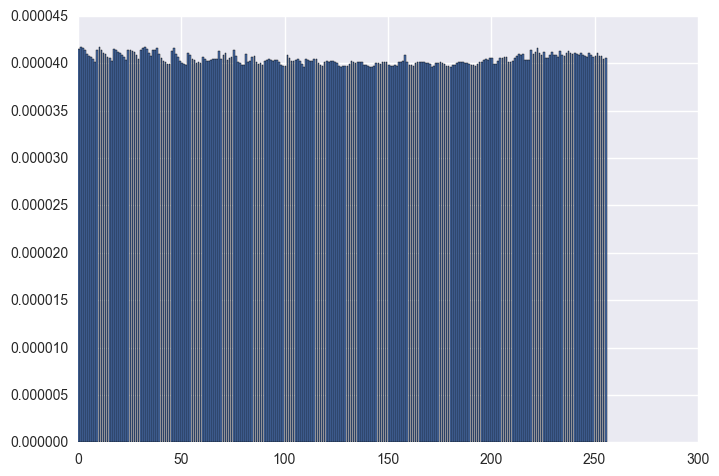

In [53]:
plt.bar(range(len(res_P[:256])), res_P[:256])
plt.show()

In [54]:
filename_S = "/Users/lmatayoshi/Desktop/EEG/S01.mat"

In [55]:
res_S = entropias_electrodos_por_sujeto(filename_S)

In [58]:
np.var(res_S)

1.3032837872013549e-12

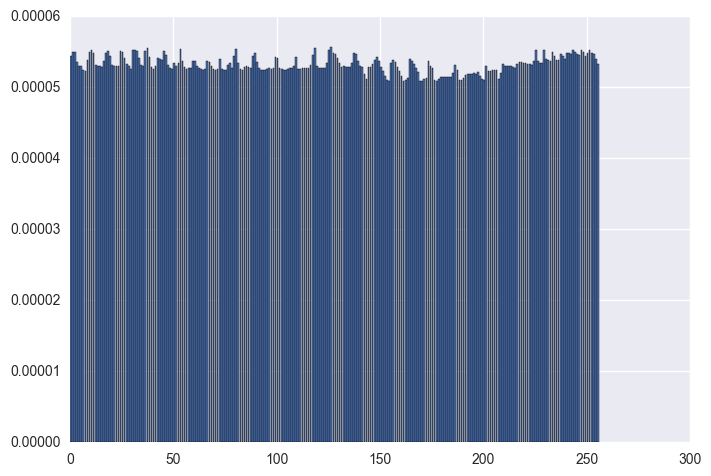

In [56]:
plt.bar(range(len(res_S[:256])), res_S[:256])
plt.show()